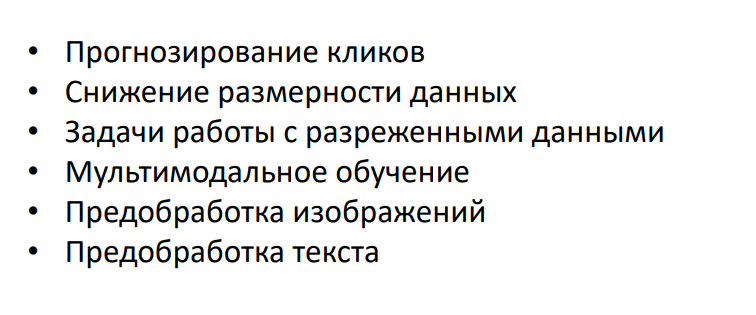

## Векторизация текстов

### 1. Bag of Words

### 2. Tf IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
texts = ['i love ice-cream', 'i love cats and dogs', 'my favourite film is cats']

In [ ]:
tfidf = TfidfVectorizer().fit(texts)

In [ ]:
transformed_version = tfidf.transform(texts)

In [ ]:
import numpy as np
transformed_version.toarray().shape

(3, 10)

In [ ]:
transformed_version.toarray()[0]

array([0.        , 0.        , 0.62276601, 0.        , 0.        ,
       0.        , 0.62276601, 0.        , 0.4736296 , 0.        ])

### 3. Word2Vec
### 4. Elmo
### 5. Bert

In [ ]:
# Word2vec

In [ ]:
import gensim
from gensim.models import Word2Vec

In [ ]:
model = Word2Vec(sentences=texts, vector_size=100, window=5, min_count=1)

In [ ]:
import gensim.downloader

In [ ]:
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
glove_vectors = gensim.downloader.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [ ]:
glove_vectors['world']

array([-0.25831  ,  0.43644  , -0.1138   , -0.5259   ,  0.20213  ,
        0.95247  , -0.58764  , -0.047001 , -0.053704 , -1.744    ,
        0.99583  ,  0.063464 , -0.093147 , -0.26441  , -0.28676  ,
       -0.52357  , -0.17867  ,  0.18171  , -0.71696  , -0.13301  ,
        0.42476  ,  0.42044  ,  0.3775   ,  0.082431 ,  0.13154  ,
       -0.10151  , -0.11898  ,  0.029509 , -0.39635  ,  0.26516  ,
       -0.55091  ,  0.23805  , -0.018748 , -0.039944 , -1.1972   ,
        0.13567  ,  0.09371  , -0.60134  ,  0.12887  ,  0.34876  ,
       -0.25588  , -0.33466  ,  0.069678 ,  0.5429   ,  0.25246  ,
        0.17249  ,  0.099885 ,  0.099456 , -0.01592  ,  0.2617   ,
        0.36155  , -0.12417  ,  0.27516  ,  0.037434 , -0.075003 ,
        0.61096  ,  0.05261  ,  0.017307 ,  0.12576  , -0.11952  ,
       -0.49077  ,  0.026711 , -0.27187  , -0.15268  , -0.22147  ,
        0.18131  , -0.045344 ,  0.76151  ,  0.17489  , -0.44112  ,
        0.027347 ,  0.42676  , -0.0069618, -0.60233  , -0.0166

In [ ]:
text = "i love world"

In [ ]:
text_tokenized = text.split()

In [ ]:
text_tokenized

['i', 'love', 'world']

In [ ]:
words_vectors = [glove_vectors[w] for w in text_tokenized]
vectors_concated = np.stack(words_vectors)
text_vetor = np.mean(vectors_concated, axis=0)

In [ ]:
text_vetor.shape

(300,)

In [ ]:
text_vetor

array([-2.81093329e-01,  9.16900039e-02, -1.07002325e-01, -1.95432350e-01,
        2.26400048e-02,  3.26246649e-01, -2.09678337e-01, -8.75340030e-02,
       -6.02910034e-02, -1.69701993e+00,  6.27250016e-01, -9.90626588e-02,
       -2.29997680e-01,  3.74190025e-02, -1.17808998e-01, -2.45558634e-01,
       -1.50120005e-01, -3.47512662e-02, -5.56763411e-02,  3.00433308e-01,
        2.07816660e-01,  6.72256708e-01,  1.06489331e-01,  1.56940341e-01,
       -2.94300020e-02, -5.42570017e-02, -4.75823991e-02, -3.19476992e-01,
        2.91966703e-02, -3.68833356e-02, -2.15934336e-01,  3.52523327e-01,
       -3.20469320e-01, -2.20261335e-01, -1.31139994e+00,  1.90446675e-01,
       -2.01053321e-01, -3.29360008e-01, -1.23326981e-03,  2.41448343e-01,
       -1.69153363e-02, -6.20393336e-01, -5.44419996e-02, -1.23066707e-02,
        2.79396683e-01,  6.03230000e-02,  5.06781638e-01,  2.16975346e-01,
        2.66066696e-02,  1.90264657e-01,  2.40060017e-01, -1.19239993e-01,
        1.42804995e-01, -

In [ ]:
# Elmo

In [ ]:
!pip install allennlp

  Using cached allennlp-2.10.1-py3-none-any.whl (730 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 980.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.2/248.2 kB 23.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 33.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 72.0 MB/s eta 0:0

In [ ]:
import allennlp
from allennlp.modules.elmo import Elmo, batch_to_ids

In [ ]:
options_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_options.json"
weight_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_weights.hdf5"

In [ ]:
elmo = Elmo(options_file, weight_file, 1, dropout=0)

Output()

Output()

In [ ]:
sentences = [['First', 'sentence', 'mama', '.'], ['Another', '.']]
character_ids = batch_to_ids(sentences)
embeddings = elmo(character_ids)

In [ ]:
embeddings['elmo_representations'][0].shape

torch.Size([2, 4, 1024])

In [ ]:
import torch
vector_text_elmo = torch.mean(embeddings['elmo_representations'][0], dim=0)
vector_text_elmo = torch.mean(vector_text_elmo, dim=0)

In [ ]:
vector_text_elmo.shape

torch.Size([1024])

## Bert

In [ ]:
!pip install transformers

In [ ]:
import transformers
from transformers import BertTokenizer
from transformers import AutoModel

#download = 'DeepPavlov/rubert-base-cased' # Russian
download = 'DeepPavlov/bert-base-multilingual-cased-sentence' # English + Russian
tokenizer = BertTokenizer.from_pretrained(download)
model = AutoModel.from_pretrained(download)

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/642 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/678M [00:00<?, ?B/s]

In [ ]:
# tokens = []
# tokens.append(tokenizer.encode("Я люблю свою собаку", "Она очень дружелюбная"))
# tokens.append(tokenizer.encode("Белый снег", "Серый лёд", "На растрескавшейся земле"))
# tokens.append(tokenizer.encode("Весь мир насилья мы разрушим", "До основанья, а затем"))
# tokens.append(tokenizer.encode("Мы наш, мы новый мир построим", "Кто был ничем, тот станет всем"))

# for t in tokens:
#     print(tokenizer.convert_ids_to_tokens(t))

['[CLS]', 'Я', 'люблю', 'свою', 'собаку', '[SEP]', 'Она', 'очень', 'дружелюб', '##ная', '[SEP]']
['[CLS]', 'Белый', 'снег', '[SEP]', 'Серый', 'лёд', '[SEP]']
['[CLS]', 'Весь', 'мир', 'насиль', '##я', 'мы', 'разруш', '##им', '[SEP]', 'До', 'основан', '##ья', ',', 'а', 'затем', '[SEP]']
['[CLS]', 'Мы', 'наш', ',', 'мы', 'новый', 'мир', 'постро', '##им', '[SEP]', 'Кто', 'был', 'ничем', ',', 'тот', 'станет', 'всем', '[SEP]']


In [ ]:
tok = tokenizer.encode_plus("Я люблю свою собаку", "Она очень дружелюбная", return_tensors = "pt")

In [ ]:
embedding_bert = model(**tok)['last_hidden_state']

In [ ]:
embedding_bert.shape

torch.Size([1, 20, 768])

In [ ]:
embedding_bert = torch.mean(embedding_bert, dim = 1).squeeze()

In [ ]:
embedding_bert

tensor([ 3.8804e-02,  9.3535e-01,  1.3968e+00,  7.1402e-01,  6.7355e-01,
        -6.1647e-01, -1.5169e-01,  1.3508e+00,  5.4837e-02,  6.7969e-01,
        -1.8430e+00, -8.5651e-02,  9.0885e-01,  6.0569e-01, -6.4775e-01,
         4.7425e-02,  1.0735e+00,  1.1359e+00,  3.2534e-01,  8.6561e-01,
         1.3473e-01, -4.1645e-01, -5.2358e-01, -2.9307e-01, -1.7268e-02,
         9.6568e-01, -1.0797e+00, -4.3991e-01, -1.8429e-01, -3.0671e-01,
        -3.7357e-01,  5.9972e-02, -3.2764e-01,  5.1579e-01,  1.6011e-01,
         6.4953e-01,  1.0403e-01,  3.3971e-01, -2.4394e-01, -3.2081e-01,
         3.3159e-01, -7.6983e-02, -9.0741e-01, -6.4762e-02,  2.6427e-01,
         4.5067e-01, -3.9279e-01, -3.2359e-01, -1.3269e-01,  4.6232e-01,
         6.3427e-01, -3.9154e-01,  9.6690e-03,  4.1325e-01, -2.2534e-01,
        -3.2332e-01, -2.3791e-01, -6.8555e-02,  4.9500e-01,  1.7634e-02,
         8.2832e-01,  4.9192e-01,  3.4550e-01,  6.5748e-01, -1.4448e-02,
         1.6324e-01, -4.5527e-01, -5.4066e-01, -3.4

# Снижение размерности

## PCA

`sklearn.decomposition.PCA`

## T-SNE

## UMAP

## Autoencoders

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])

In [ ]:
X_embedded = TSNE(n_components=2, learning_rate='auto',
                   init='random', perplexity=3).fit_transform(X)

In [ ]:
X_embedded

array([[ -5.0222077,  47.860294 ],
       [-74.31918  ,  53.801804 ],
       [-80.80871  , -15.403574 ],
       [-11.610577 , -21.506285 ]], dtype=float32)

In [ ]:
# Umap
! pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=d0d3d260fa92a148d4a9b93e1f02673557374d0f15c47f703bb97d07f9ce770c
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=b28dd0d2446e981403db11135948b2e4f16fa7d5a9620d14f8b9a6a6bf143bfe
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
import pandas as pd

In [ ]:
penguins = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/c19a904462482430170bfe2c718775ddb7dbb885/inst/extdata/penguins.csv")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
penguins = penguins.dropna()

In [ ]:
import umap

In [ ]:
reducer = umap.UMAP()

In [ ]:
penguin_data = penguins[
    [
        "bill_length_mm",
        "bill_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)

In [ ]:
embedding = reducer.fit_transform(scaled_penguin_data)

## Упражнение

